In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir Data
!cp "/content/drive/MyDrive/DL_LAB/ASG4/Churn_Modelling.csv" "./Data"

mkdir: cannot create directory ‘Data’: File exists


Importing necessary libraries

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


##**Implement ANN model on CIFAR10 dataset.**

CIFAR10 dataset is commonly used in Deep Learning for testing models of Image Classification. It has 60,000 color images comprising of 10 different classes. The image size is 32x32 and the dataset has 50,000 training images and 10,000 test images

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


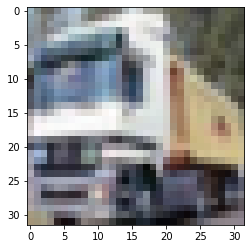

In [ ]:
#loading data set and splitting into trainset testset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

The class_names list is made based on labels and their standard associated index values in original dataset.

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Flattening the images from the 28x28 pixels to 1D 787 pixels

In [ ]:
X_train = X_train.reshape(50000, 32*32*3)
X_test = X_test.reshape(10000, 32*32*3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# Normalizing the data in range [0,1]
X_train /= 255.0
X_test /= 255.0

In [ ]:
#converting target values into one hot encoding 
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
#Defining model
model = Sequential()
#hidden layer
model.add(Dense(100, input_shape=(32*32*3,), activation='relu'))
#output layer
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               307300    
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate = 0.001))
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 3s 7ms/step - loss: 1.8719 - accuracy: 0.3495 - val_loss: 1.8705 - val_accuracy: 0.3451
Epoch 2/30
391/391 [==============================] - 3s 7ms/step - loss: 1.8582 - accuracy: 0.3539 - val_loss: 1.8580 - val_accuracy: 0.3547
Epoch 3/30
391/391 [==============================] - 3s 6ms/step - loss: 1.8464 - accuracy: 0.3604 - val_loss: 1.8467 - val_accuracy: 0.3579
Epoch 4/30
391/391 [==============================] - 3s 6ms/step - loss: 1.8358 - accuracy: 0.3647 - val_loss: 1.8370 - val_accuracy: 0.3590
Epoch 5/30
391/391 [==============================] - 2s 6ms/step - loss: 1.8263 - accuracy: 0.3669 - val_loss: 1.8276 - val_accuracy: 0.3651
Epoch 6/30
391/391 [==============================] - 2s 6ms/step - loss: 1.8176 - accuracy: 0.3701 - val_loss: 1.8201 - val_accuracy: 0.3663
Epoch 7/30
391/391 [==============================] - 3s 6ms/step - loss: 1.8096 - accuracy: 0.3751 - val_loss: 1.8124 - val_accuracy: 0.3718
Epoch 

We can see here that due to more no of model parameters(weights) it is consuming more time and we need to pass less no of epochs in argument. SO ANN for image classification is not efficient way.


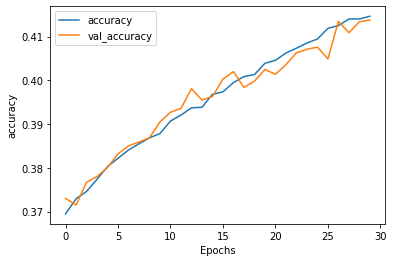

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'accuracy')

In [ ]:
# checking accuracy and loss on test data
loss,acc = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6967 - accuracy: 0.4138


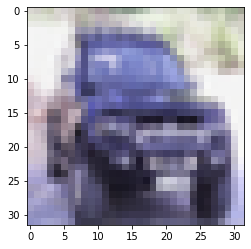

In [ ]:

X_test = X_test.reshape(10000, 32,32,3)
plt.imshow(X_test[9], cmap=plt.get_cmap('gray'))

In [ ]:
print("Above classified object is a",class_names[np.argmax((model.predict(X_test.reshape(10000, 32*32*3)))[9])])

Above classified object is a automobile


##**Apply binary classification on churn modelling dataset.**

**Baseline model**

In [ ]:
bank_df=pd.read_csv('./Data/Churn_Modelling.csv')

In [ ]:
# we will convert male = 1 and female = 0
bank_df.Gender = bank_df.Gender.replace('Male',1)
bank_df.Gender = bank_df.Gender.replace('Female',0)

In [ ]:
bank_df=bank_df.drop(columns=['CustomerId','RowNumber','Geography','Surname'])
bank_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# dividing data into train set and test set
train_data1, test_data1 = train_test_split(bank_df, test_size=0.2, random_state=25)


In [ ]:
# Seperating Features and Target values
x_train1, y_train1 = train_data1.drop('Exited', axis=1), train_data1['Exited']
x_test1, y_test1 = test_data1.drop('Exited', axis=1), test_data1['Exited']

In [ ]:
#one hot encoding on target values based on no of class
ohe = OneHotEncoder()

y_train1=np.array(y_train1).reshape(-1,1)
y_train1 = ohe.fit_transform(y_train1).toarray()

y_test1=np.array(y_test1).reshape(-1,1)
y_test1 = ohe.fit_transform(y_test1).toarray()

In [ ]:
y_test1

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
#function to normalize the data

def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

In [ ]:
# normalizing the Features of trainset and testset
x_train_scaled_all1, x_test_scaled_all1 = scale_datasets(x_train1, x_test1)

In [ ]:
# Dividing scalled train data into train and validation data

X_train_scaled1, X_val_scaled1, Y_train1, Y_val1 = train_test_split(x_train_scaled_all1, y_train1, test_size=0.20, random_state=40)
print(X_train_scaled1.shape)
print(Y_train1.shape)
print(X_val_scaled1.shape)
#validation data is not test data...
#validation data is to check whether during training whether our training is happening successfully or not

(6400, 9)
(6400, 2)
(1600, 9)


In [ ]:
# Defining model for classification
model1 = Sequential()
model1.add(Dense(activation = "relu", input_dim = 9, 
                     units = 10, kernel_initializer = "uniform"))
#model1.add(Dense(activation = "relu", units = 8, 
 #                    kernel_initializer = "uniform"))
model1.add(Dense(activation = "sigmoid", units = 2, 
                     kernel_initializer = "uniform"))
model1.compile(optimizer = 'SGD' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                100       
                                                                 
 dense_13 (Dense)            (None, 2)                 22        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model1.fit(X_train_scaled1 , Y_train1 , batch_size = 1024 ,epochs = 300 )


Epoch 1/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.7867
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.7939
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.7939
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.7939
Epoch 5/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.7939
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.7939
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.7939
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.7939
Epoch 9/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.7939
Epoch 10/300
7/7 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.7939
Epoch 11/300
7/7 [===========

In [ ]:
# prediction on scalled train data
pred_train1= model1.predict(X_train_scaled1)
scores = model1.evaluate(X_train_scaled1, Y_train1, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores[1]*100, (1 - scores[1])*100))   
 

Accuracy on training data: 79.39062714576721% 
Error on training data: 20.609372854232788


In [ ]:
# prediction on scalled test data
pred_test1= model1.predict(x_test_scaled_all1)

scores1 = model1.evaluate(x_test_scaled_all1, y_test1, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores1[1]*100, (1 - scores1[1])*100))    

Accuracy on test data: 80.50000071525574% 
Error on test data: 19.499999284744263


In [ ]:
#Converting predictions to label(reversing onehot encoding operation)
pred1 = list()
for i in range(len(pred_test1)):
    pred1.append(np.argmax(pred_test1[i])) # returns index of maximum value

In [ ]:
#Converting predictions to label(reversing onehot encoding operation) 
test1 = list()
for i in range(len(y_test1)):
    test1.append(np.argmax(y_test1[i])) # returns index of maximum value


In [ ]:
#comparing test and prediction
pd.DataFrame({'Test':test1,'Pred':pred1}).head(20)

,Test,Pred
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
